#### Practical 5

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

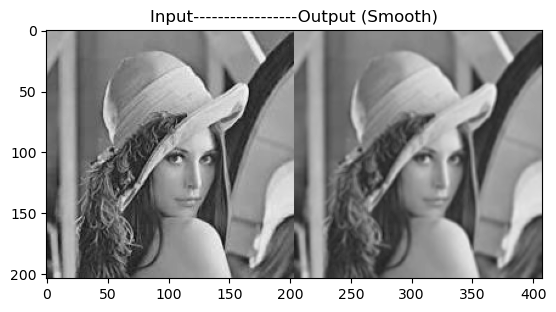

In [97]:
# low pass filter 3x3
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
kernel = kernel/np.sum(kernel)

img = cv2.imread("Lenna.jpg",0)

fil = cv2.filter2D(img,-1,kernel)
plt.title("Input-----------------Output (Smooth)")
imgstack = np.hstack((img,fil))
plt.imshow(imgstack,cmap="gray");

In [98]:
# low pass filter 5x5
kernel = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
kernel = kernel/np.sum(kernel)

img = cv2.imread("Lenna.jpg",0)

fil = cv2.filter2D(img,-1,kernel)
plt.title("Input-----------------Output (Smoother)")
imgstack = np.hstack((img,fil))
plt.imshow(imgstack,cmap="gray");

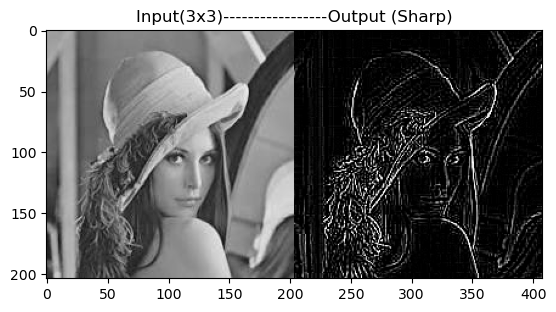

In [99]:
# High Pass Filter 3x3
sharp_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

img = cv2.imread("Lenna.jpg",0)

if np.sum(sharp_kernel)==0:
    pass
else:
    sharp_kernel = sharp_kernel/np.sum(sharp_kernel)
    
fil = cv2.filter2D(img,-1,sharp_kernel)
plt.title("Input(3x3)-----------------Output (Sharp)")

imgstack = np.hstack((img,fil))
plt.imshow(imgstack,cmap="gray")

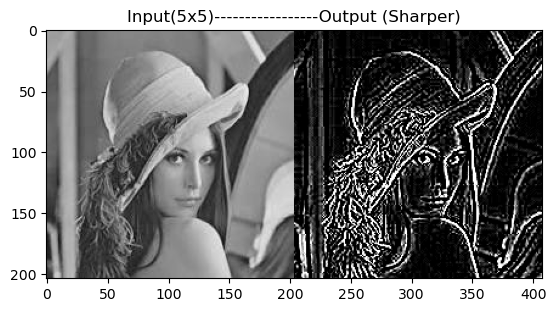

In [100]:
# High Pass Filter 5x5
sharp_kernel = np.array([[0,-1,-1,-1,0],
                         [-1,2,-4,2,-1],
                         [-1,-4,20,-4,-1],
                         [-1,2,-4,2,-1],
                         [0,-1,-1,-1,0]])

img = cv2.imread("Lenna.jpg",0)

if np.sum(sharp_kernel)==0:
    pass
else:
    sharp_kernel = sharp_kernel/np.sum(sharp_kernel)
    
fil = cv2.filter2D(img,-1,sharp_kernel)
plt.title("Input(5x5)-----------------Output (Sharper)")

imgstack = np.hstack((img,fil))
plt.imshow(imgstack,cmap="gray")

In [101]:
#median filtering
img = cv2.imread("Lenna.jpg",0)
img_noisy = np.random.randint(0,50,size=img.shape,dtype=np.uint8) + img 
plt.imshow(img_noisy,cmap="gray")

m, n = img_noisy.shape 
denoised_image = np.zeros([m, n],dtype=np.uint8) 

for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy[i-1, j-1], 
               img_noisy[i-1, j], 
               img_noisy[i-1, j + 1], 
               img_noisy[i, j-1], 
               img_noisy[i, j], 
               img_noisy[i, j + 1], 
               img_noisy[i + 1, j-1], 
               img_noisy[i + 1, j], 
               img_noisy[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        denoised_image[i, j]= temp[4] 
  
denoised_image= denoised_image.astype(np.uint8) 
# cv2.imwrite('new_median_filtered.png', denoised_image)

img_stack = np.hstack((img_noisy,denoised_image))
plt.title("Input-----------------Output (Denoised)")
plt.imshow(img_stack,cmap="gray");